<a href="https://colab.research.google.com/github/Krshnna/Customer-K-Means-Segmentation/blob/main/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1016]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (16,8)

In [1017]:
!kaggle datasets download -d amitabhajoy/bengaluru-house-price-data

bengaluru-house-price-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [1018]:
df = pd.read_csv('/content/bengaluru-house-price-data.zip')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00




> ### Exploratory Data Analysis



In [1019]:
df.shape

(13320, 9)

In [1020]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [1021]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [1022]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [1023]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64



> ### Data visualization



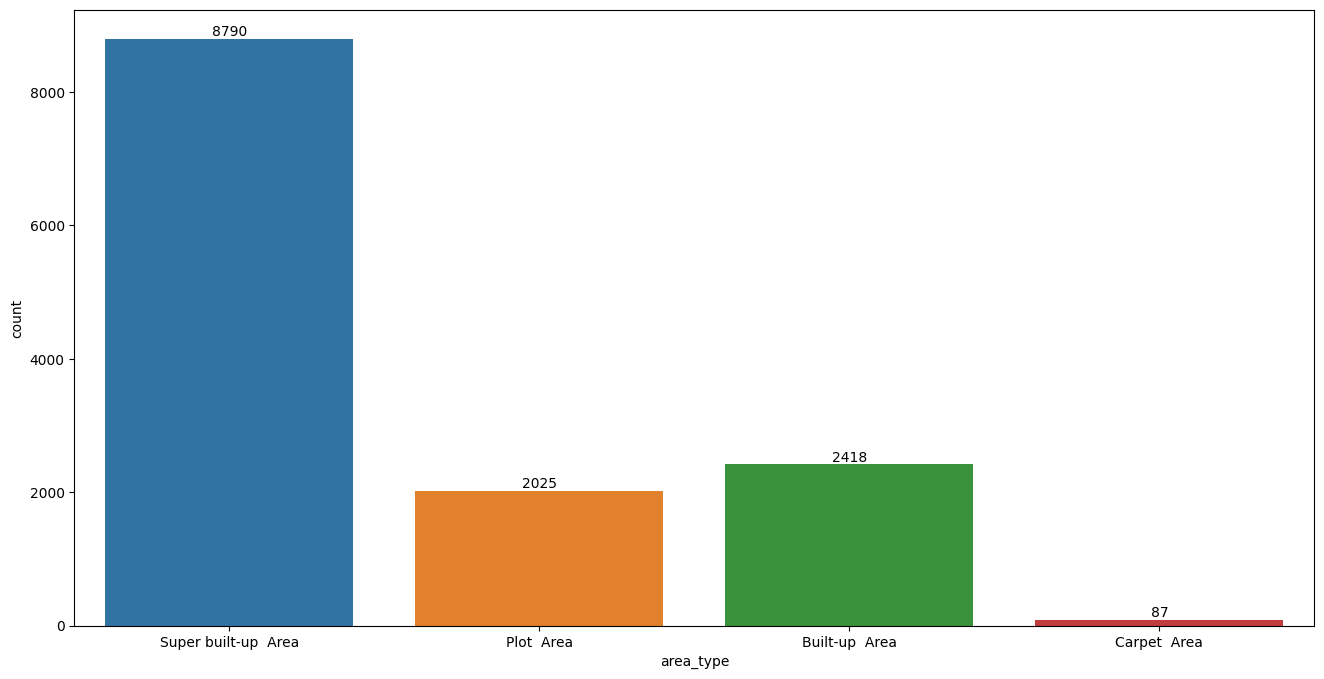

In [1024]:
ax = sns.countplot(x = 'area_type', data = df)
for bar in ax.containers:
  ax.bar_label(bar)

In [1025]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

<Axes: >

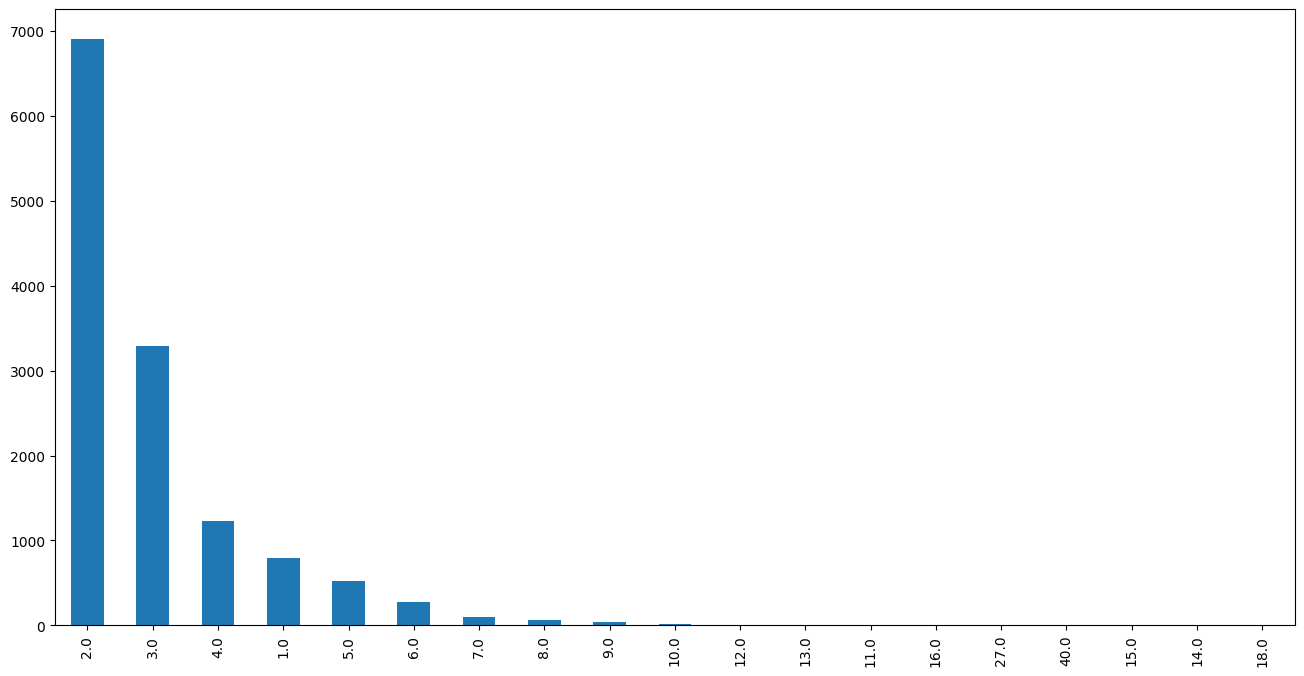

In [1026]:
df.bath.value_counts().plot(kind = 'bar')

## we have to drop less important columns from our dataset

In [1027]:
df.drop(['area_type', 'availability', 'balcony', 'society'], axis = 1, inplace = True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [1028]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

drop the null values from location, size and bath

In [1029]:
df.dropna(subset = ['location', 'size', 'bath'], inplace = True)

In [1030]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64



> ### Now feature Engineering



In [1031]:
df['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [1032]:
df['bhk'] = df['size'].apply(lambda x : int(x.split(" ")[0]))

In [1033]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [1034]:
df.drop(['size'], axis = 1, inplace = True)

In [1035]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


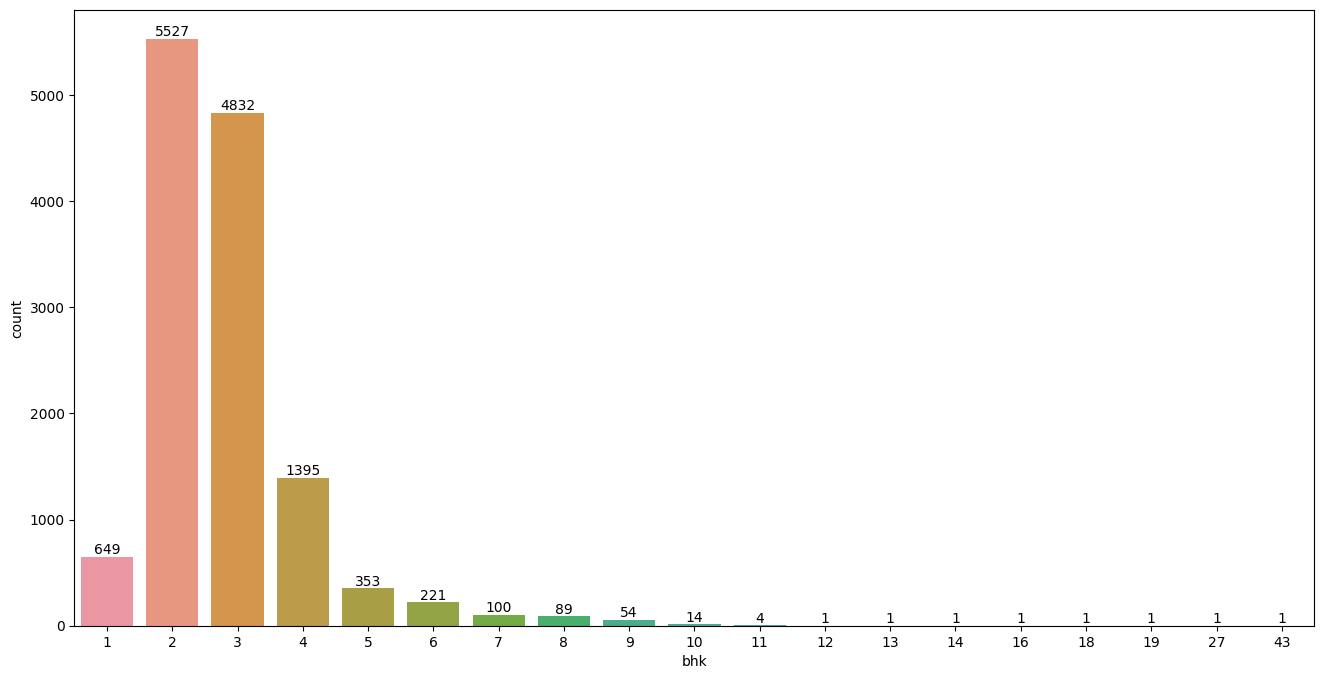

In [1036]:
ax = sns.countplot(x = 'bhk', data = df)
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='bhk', ylabel='bath'>

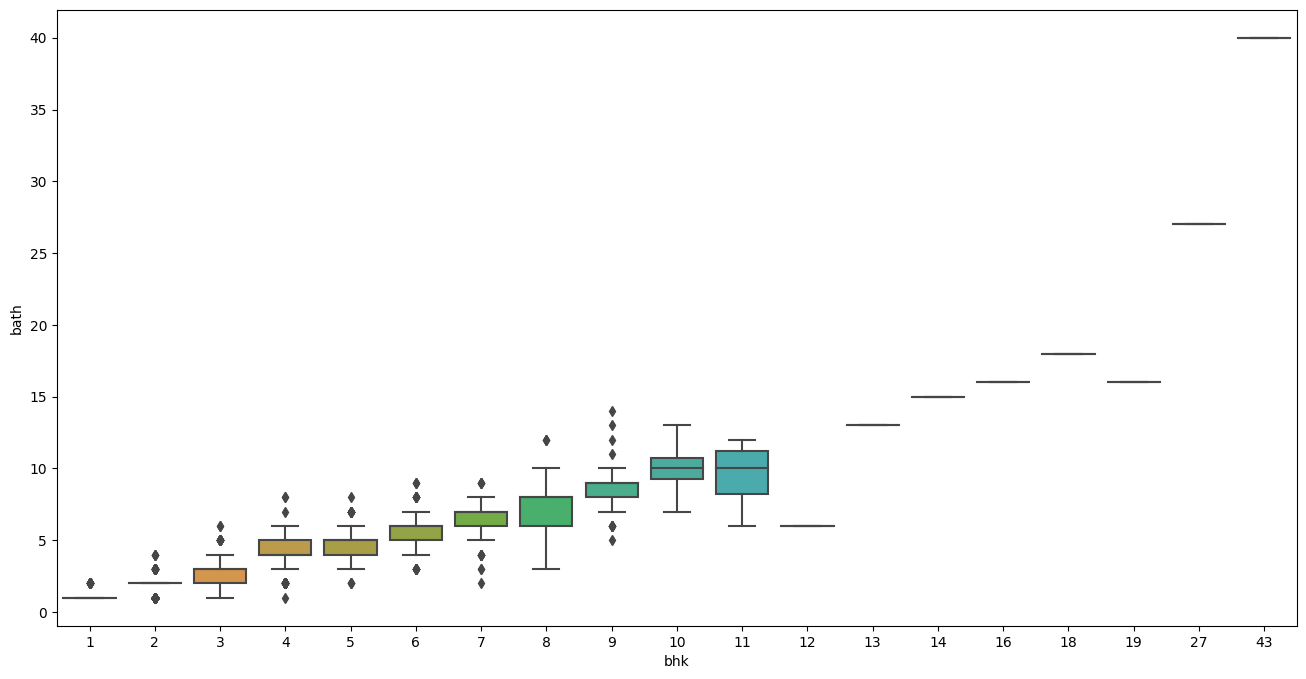

In [1037]:
sns.boxplot(x = 'bhk', y = 'bath', data = df)

In [1038]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

we can see that values are in series type like 2000 - 2100, we have to change it to simple integer, so we that mean of min and max in that series

In [1039]:
def convert(x):
  val = x.split("-")
  if len(val) == 2:
    return (float(val[0]) + float(val[1])) / 2
  try:
    return float(x)
  except:
    return None

In [1040]:
df['total_sqft'] = df['total_sqft'].apply(convert)
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [1041]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


we will add new feature in the column price_per_sqft

In [1042]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [1043]:
df['location'] = df['location'].apply(lambda x : x.strip())  # reduce the leading and trailing spaces
df['location'].value_counts()

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [1044]:
location10 = df['location'].value_counts()

In [1045]:
location10 = location10[location10 <= 10]
location10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [1046]:
df['location'] = df['location'].apply(lambda x : 'others' if x in location10 else x)

In [1047]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [1048]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+03
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


From the survey, general sqft for 1 bhk home in banglore is 400 or 500 sqft.

in order to remove outliers, we keep minimum threshold is 400sqft in total_sqrt.

In [1049]:
df[df['total_sqft'] / df['bhk'] < 400]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,others,1020.0,6.0,370.0,6,36274.509804
16,Bisuvanahalli,1180.0,3.0,48.0,3,4067.796610
26,Electronic City,660.0,1.0,23.1,2,3500.000000
29,Electronic City,1025.0,2.0,47.0,3,4585.365854
31,Bisuvanahalli,1075.0,2.0,35.0,3,3255.813953
...,...,...,...,...,...,...
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13300,Hosakerehalli,1500.0,6.0,145.0,5,9666.666667
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649
13306,others,1200.0,5.0,325.0,4,27083.333333


In [1050]:
df = df[~(df['total_sqft'] / df['bhk'] < 400)]

In [1051]:
df.shape

(11757, 6)

In [1052]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11711.000000,11757.000000,11757.000000,11757.000000,11711.000000
mean,1618.580117,2.541124,111.935372,2.606447,6183.801944
std,1289.698971,1.046445,155.002961,0.936484,4009.858885
min,400.000000,1.000000,9.000000,1.000000,267.829813
25%,1130.000000,2.000000,50.000000,2.000000,4208.337500
50%,1320.000000,2.000000,70.000000,2.000000,5277.777778
75%,1720.000000,3.000000,115.000000,3.000000,6800.000000
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [1053]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df ],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)

In [1054]:
df['bath'] = df['bath'].astype(int)

In [1055]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,1524.971839,2.465158,91.790463,2.541789,5621.997259
std,903.489550,0.954787,87.450360,0.859201,2186.163226
min,400.000000,1.000000,10.000000,1.000000,912.151821
25%,1125.000000,2.000000,50.000000,2.000000,4251.577443
50%,1300.000000,2.000000,68.000000,2.000000,5175.180696
75%,1656.000000,3.000000,100.000000,3.000000,6385.341477
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


<ipython-input-1056-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

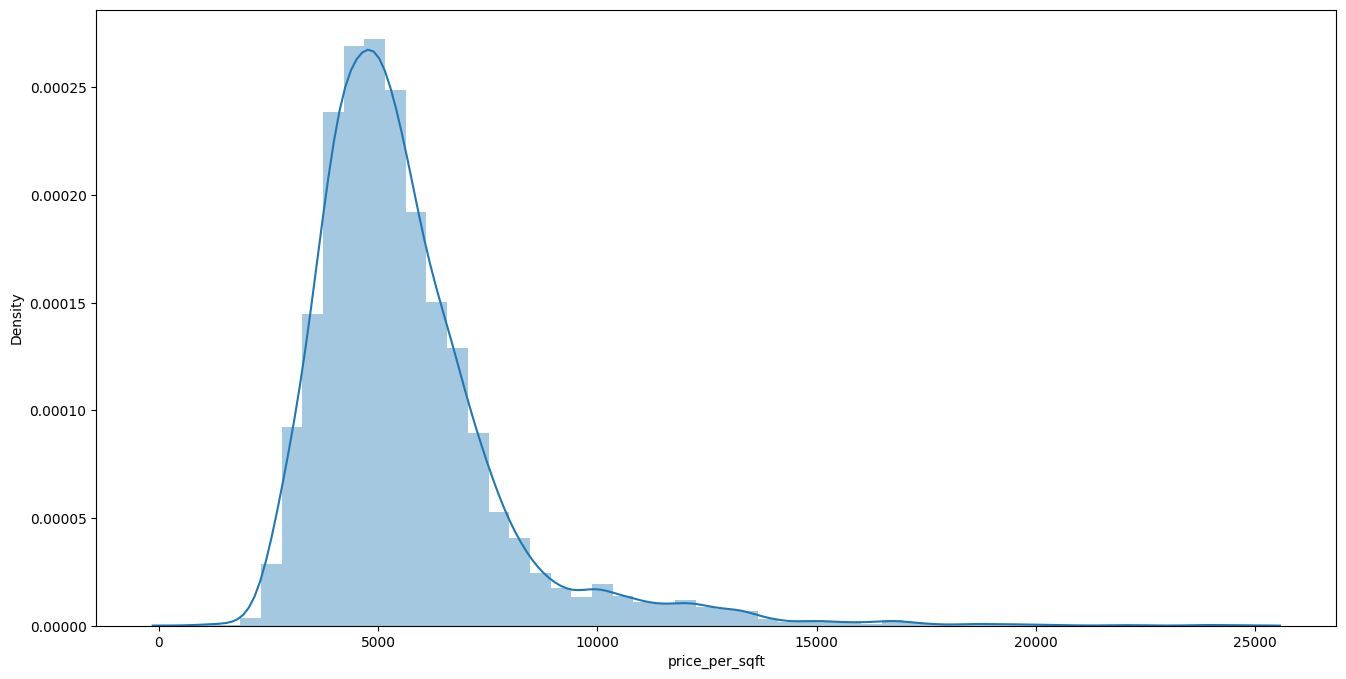

In [1056]:
sns.distplot(df['price_per_sqft'])

<Axes: >

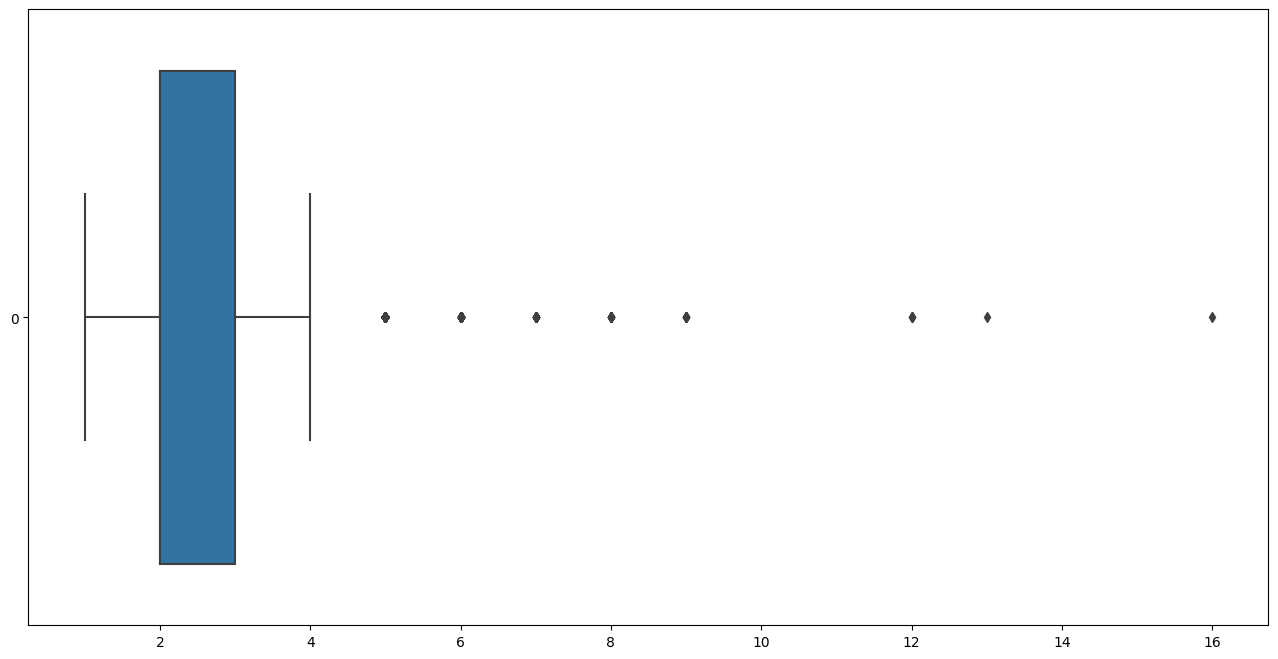

In [1057]:
sns.boxplot(df['bath'], orient = 'h')

In [1058]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2,148.0,2,11983.805668


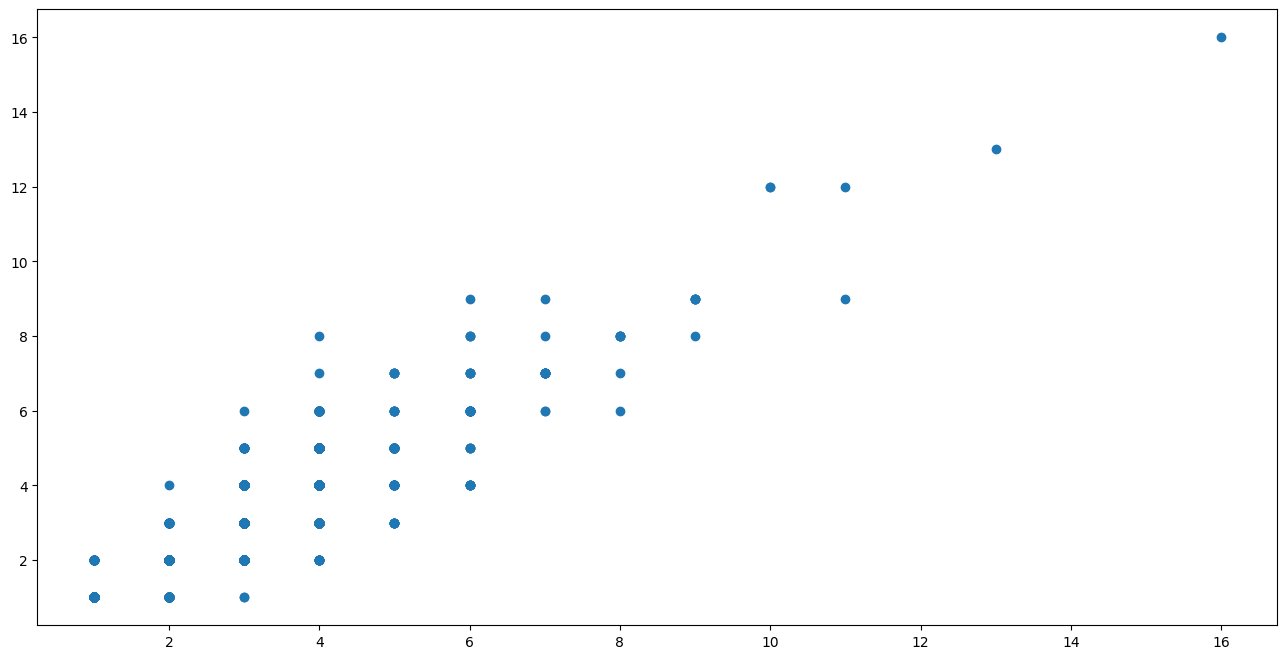

In [1059]:
ax = plt.scatter(x = 'bhk', y = 'bath', data = df)

In [1060]:
df = df[df['bath'] <= df['bhk'] + 2]
df.shape

(9496, 6)

### now using one hot encoding for location


In [1061]:
dummy = pd.get_dummies(df['location'])
df = pd.concat([df, dummy.drop(['others'], axis = 1)], axis = 1)

In [1062]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4,428.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2,235.0,3,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2,130.0,3,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1063]:
df.drop(columns = ['location'], axis = 1, inplace = True)

since price_per_sqft is just to remove outliers, we dont need it now, our work is done.

In [1064]:
df.drop(columns = ['price_per_sqft'], axis = 1, inplace = True)  

## spliting the data into training and test data

In [ ]:
x = df.drop(['price'], axis = 1)
y = df['price']
x, y

In [1066]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

Standardize the data

In [1067]:
from sklearn.preprocessing import StandardScaler

In [1068]:
scaler = StandardScaler()

In [1069]:
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

In [1070]:
lr = LinearRegression()

In [1071]:
lr.fit(x_train, y_train)

LinearRegression()

In [1074]:
lr.predict(x_test)

array([130.22616028, 113.09020991,  92.04898337, ...,  44.84366684,
        50.8732095 ,  62.65211483])

In [1075]:
lr.score(x_test, y_test)

0.8268208392223888

In [1082]:
def predict_price(location, size, bath, room):
  loc_index = np.where(x.columns==location)[0][0]
  X = np.zeros(len(x.columns))
  X[0] = size
  X[1] = bath
  X[2] = room
  if loc_index >= 0:
      X[loc_index] = 1
  return lr.predict([X])[0]

In [1087]:
predict_price('Indira Nagar',1500, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


203.21360133449403